In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn
%matplotlib inline

In [2]:
df_mkt_hml_smb_rf = pd.read_csv('data/factors/Mkt, HML,SMB, risk_free data F-F_Research_Data_Factors_daily.csv',
                index_col='Date')
df_mkt_hml_smb_rf.index = pd.to_datetime(df_mkt_hml_smb_rf.index, format='%Y%m%d')
# df_mkt_hml_smb_rf.ix['1997-01-01':]

In [3]:
df_mom = pd.read_csv('data/factors/momtum_data F-F_Momentum_Factor_daily.csv',
                index_col='Date')
df_mom.index = pd.to_datetime(df_mom.index, format='%Y%m%d')
df_mom.head()

,Mom
Date,
1926-11-03,0.57
1926-11-04,-0.52
1926-11-05,1.15
1926-11-06,-0.04
1926-11-08,-0.01


In [4]:
df_inv_grade = pd.read_excel('data/factors/investment grade credit spread.xlsx',
                index_col='Date')
df_inv_grade.index = pd.to_datetime(df_inv_grade.index, format='%Y%m%d')
df_inv_grade.sort_index(inplace=True)
df_inv_grade.head()

,Credit Spread Investment Grade
Date,
1996-03-07,147.9
1996-03-08,135.3
1996-03-11,139.1
1996-03-12,140.4
1996-03-13,138.2


In [5]:
df_vol = pd.read_csv('data/factors/short_vol_bxmarchive_1984_2017.csv', 
                 index_col='Date')
df_vol.index = pd.to_datetime(df_vol.index)
df_vol.rename(index=str, columns={"BXM Level": "BXM Level (Volatility)"}, inplace=True)
df_vol.head()

,BXM Level (Volatility)
Date,
1986-06-30 00:00:00,92.21
1986-07-01 00:00:00,92.57
1986-07-02 00:00:00,92.61
1986-07-03 00:00:00,92.82
1986-07-07 00:00:00,90.99


In [6]:
df_hy_credit = pd.read_excel('data/factors/US HY credit spread.xlsx', 
                 index_col='Date')
df_hy_credit.dropna(how="all", inplace=True) 
df_hy_credit.index = pd.to_datetime(df_hy_credit.index)
df_hy_credit.sort_index(inplace=True)
df_hy_credit.rename(index=str, columns={"Last_Price": "Last_Price (High Yield Credit Spread)"}, inplace=True)
df_hy_credit.head()

,Last_Price (High Yield Credit Spread)
Date,
1996-03-07 00:00:00,3.62
1996-03-08 00:00:00,3.28
1996-03-11 00:00:00,3.36
1996-03-12 00:00:00,3.33
1996-03-13 00:00:00,3.33


In [7]:
df_liq = pd.read_csv('data/factors/liquidity.csv', 
                 index_col='DATE', usecols=['DATE', 'PS_VWF'])
df_liq.index = pd.to_datetime(df_liq.index)
df_liq.rename(index=str, columns={"PS_VWF": "PS_VWF (Liquidity)"}, inplace=True)
df_liq.head()

,PS_VWF (Liquidity)
DATE,
1997-01-31 00:00:00,-0.037276
1997-02-28 00:00:00,-0.035043
1997-03-31 00:00:00,0.016820
1997-04-30 00:00:00,0.062007
1997-05-30 00:00:00,0.012119


In [8]:
def Aggregate_Monthly(df, cols=''):
    grouped = df.groupby(pd.TimeGrouper(freq='M'))  # group by month

    arr = [None] * len(grouped)   # create empty array of number of months in time series
    for i, (name, group) in enumerate(grouped):  # iterate through each grouped by month object with index i
        #print (i, name, group.iloc[-1])
        arr[i] = (name, group.values[-1][0])     # assign position i of array with date (name) and last-day-of-month value 

    df_new = pd.DataFrame(arr, columns=cols) # create new dataframe with values
    df_new.set_index('Date', inplace=True)
    return df_new

In [9]:
df_mom_new = Aggregate_Monthly(df_mom, ['Date', 'Momentum'])
df_mom_new.head()

,Momentum
Date,
1926-11-30,0.16
1926-12-31,-0.69
1927-01-31,0.46
1927-02-28,0.30
1927-03-31,-0.15


In [10]:
df_hy_credit.index = pd.to_datetime(df_hy_credit.index)
df_hy_credit_new = Aggregate_Monthly(df_hy_credit, ['Date', 'Last_Price (High Yield Credit Spread)'])
df_hy_credit_new.head()

,Last_Price (High Yield Credit Spread)
Date,
1996-03-31,3.51
1996-04-30,3.29
1996-05-31,3.16
1996-06-30,3.30
1996-07-31,3.38


In [11]:
df_inv_grade.index = pd.to_datetime(df_inv_grade.index)
df_inv_grade_new = Aggregate_Monthly(df_inv_grade, ['Date', 'Credit Spread Investment Grade'])
df_inv_grade_new.head()

,Credit Spread Investment Grade
Date,
1996-03-31,141.3
1996-04-30,124.0
1996-05-31,112.8
1996-06-30,114.9
1996-07-31,109.6


In [13]:
df_vol.index = pd.to_datetime(df_vol.index)
df_vol_new = Aggregate_Monthly(df_vol, ['Date', 'BXM Level (Volatility)'])
# df_vol_new.head()

In [31]:
grouped = df_mkt_hml_smb_rf.groupby(pd.TimeGrouper(freq='M'))  # group by month

arr = [None] * len(grouped)   # create empty array of number of months in time series
for i, (name, group) in enumerate(grouped):  # iterate through each grouped by month object with index i
    #print (i, name, group.iloc[-1])
    arr[i] = (name, group.values[-1][0], 
              group.values[-1][1], group.values[-1][2], 
              group.values[-1][3])     # assign position i of array with date (name) and last-day-of-month value 

df_mkt_hml_smb_rf_new = pd.DataFrame(arr, columns=['Date', 'Mkt-RF','SMB', 'HML', 'RF']) # create new dataframe with values
df_mkt_hml_smb_rf_new.set_index('Date', inplace=True)
# df_mkt_hml_smb_rf_new.head()
# df_mkt_hml_smb_rf_new.ix['1997-01-01':]

## Monthly factors with and without liquidity

In [133]:
def Merge_Monthly_Factors(df_mom_new, df_vol_new, df_mkt_hml_smb_rf_new, df_hy_credit_new, df_inv_grade_new, 
                          df_liq = '', liq=False):
    '''
    Pass in df_liq parameter with liquidity dataframe AND set liq parameter to True if want to include liquidity in
    '''
    
    df = df_mom_new.join(df_vol_new, how='outer').join(df_mkt_hml_smb_rf_new, how='outer').join(
    df_hy_credit_new, how='outer').join(df_inv_grade_new, how='outer')
    if liq:
        df = df.ix['1997-01-01':'2015-12-31']
        df['Liquidity'] = df_liq['PS_VWF (Liquidity)'].values
    else:
#         df.drop('Liquidity', axis=1, inplace=True)
        pass

    df.dropna(inplace=True)

    return df

In [134]:
def Take_Log_Diff(df):
    #Replace volatility and high yield credit spread with log returns (they are prices previously)
    df['BXM Level (Volatility)'] = np.log(df['BXM Level (Volatility)'])
    df['BXM Level (Volatility)'] = df['BXM Level (Volatility)'].diff()
    # df_new_mon['BXM Level (Volatility)'] *= 100

    df['Last_Price (High Yield Credit Spread)'] = np.log(df['Last_Price (High Yield Credit Spread)'])
    df['Last_Price (High Yield Credit Spread)'] = df['Last_Price (High Yield Credit Spread)'].diff()
    # df_new_mon['Last_Price (High Yield Credit Spread)'] *= 100

    df['Credit Spread Investment Grade'] = np.log(df['Credit Spread Investment Grade'])
    df['Credit Spread Investment Grade'] = df['Credit Spread Investment Grade'].diff()

    df.shift(1)

    df.dropna(inplace=True)
    
    return df

### With liquidity

In [135]:
df_new_mon = Merge_Monthly_Factors(df_mom_new, df_vol_new, df_mkt_hml_smb_rf_new, 
                                   df_hy_credit_new, df_inv_grade_new, df_liq, True)
df_new_mon_logs = Take_Log_Diff(df_new_mon)

In [136]:
df_new_mon_logs.to_csv('With_Liquidity_Monthly_Factors_Log_Returns_Aggregated.csv')

In [137]:
df_new_mon_logs.head()

,Momentum,BXM Level (Volatility),Mkt-RF,SMB,HML,RF,Last_Price (High Yield Credit Spread),Credit Spread Investment Grade,Liquidity
Date,,,,,,,,,
1997-02-28,-0.63,0.009132,-0.49,0.04,0.15,0.020,-0.074635,-0.015558,-0.035043
1997-03-31,-0.76,-0.017277,-2.26,0.66,1.06,0.021,0.114909,-0.082587,0.016820
1997-04-30,-0.30,0.031239,0.93,-0.43,-0.44,0.020,0.019545,0.094708,0.062007
1997-05-31,0.07,0.015247,0.55,-0.30,0.51,0.023,-0.101783,0.016219,0.012119
1997-06-30,-0.24,0.012946,-0.10,1.61,-0.68,0.018,-0.028988,-0.000847,0.008803


### Without Liquidity

In [138]:
df_new_mon_no_liq = Merge_Monthly_Factors(df_mom_new, df_vol_new, df_mkt_hml_smb_rf_new, 
                                   df_hy_credit_new, df_inv_grade_new, '')
df_new_mon_no_liq_logs = Take_Log_Diff(df_new_mon)

ValueError: labels ['Liquidity'] not contained in axis

In [128]:
df_new_mon_no_liq_logs.to_csv('No_Liquidity_Monthly_Factors_Log_Returns_Aggregated.csv')

In [132]:
# df_new_mon_no_liq_logs.drop('Liquidity', axis=1, inplace=True)
df_new_mon_no_liq_logs.head()

,Momentum,BXM Level (Volatility),Mkt-RF,SMB,HML,RF,Last_Price (High Yield Credit Spread),Credit Spread Investment Grade
Date,,,,,,,,
1998-10-31,-0.85,-0.118592,1.22,-0.80,0.71,0.015,-0.263115,-1.456452
1999-09-30,0.33,-0.900906,0.92,0.36,-0.86,0.018,0.469820,0.815030
2006-08-31,0.13,-0.293958,0.03,0.00,0.23,0.018,-0.274034,0.918741
2008-03-31,-0.88,0.558460,0.57,0.03,0.59,0.009,-0.561378,0.344875
2008-08-31,-0.47,3.813822,-1.25,0.23,0.64,0.006,-0.785953,-2.046851


## Factors aggregated Daily

In [26]:
df_new_day = df_mom.join(df_vol).join(df_mkt_hml_smb_rf).join(df_hy_credit).join(df_liq).join(df_inv_grade)
df_new_day = df_new_day.ix['1997-01-01':]
df_new_day.head()

,Mom,BXM Level (Volatility),Mkt-RF,SMB,HML,RF,Last_Price (High Yield Credit Spread),PS_VWF (Liquidity),Credit Spread Investment Grade
1997-01-01,NaN,NaN,NaN,NaN,NaN,NaN,3.04,NaN,NaN
1997-01-02,-1.34,324.45,-0.75,0.05,0.14,0.02,2.95,NaN,115.6
1997-01-03,0.43,327.59,1.39,-0.32,-0.78,0.02,2.96,NaN,116.2
1997-01-06,0.52,328.12,0.02,0.11,0.06,0.02,2.93,NaN,114.9
1997-01-07,0.22,329.23,0.72,-0.03,-0.51,0.02,2.92,NaN,117.6


,Mom,BXM Level (Volatility),Mkt-RF,SMB,HML,RF,Last_Price (High Yield Credit Spread),PS_VWF (Liquidity),Credit Spread Investment Grade
Date,,,,,,,,,
1997-01-02,0.43,0.009631,1.39,-0.32,-0.78,0.02,0.003384,NaN,0.005177
1997-01-03,0.52,0.001617,0.02,0.11,0.06,0.02,-0.010187,NaN,-0.011251
1997-01-06,0.22,0.003377,0.72,-0.03,-0.51,0.02,-0.003419,NaN,0.023227
1997-01-07,0.11,-0.001581,-0.44,0.50,0.52,0.02,-0.017272,NaN,-0.031968
1997-01-08,0.22,0.003553,0.72,-0.38,-0.15,0.02,0.030877,NaN,0.024286


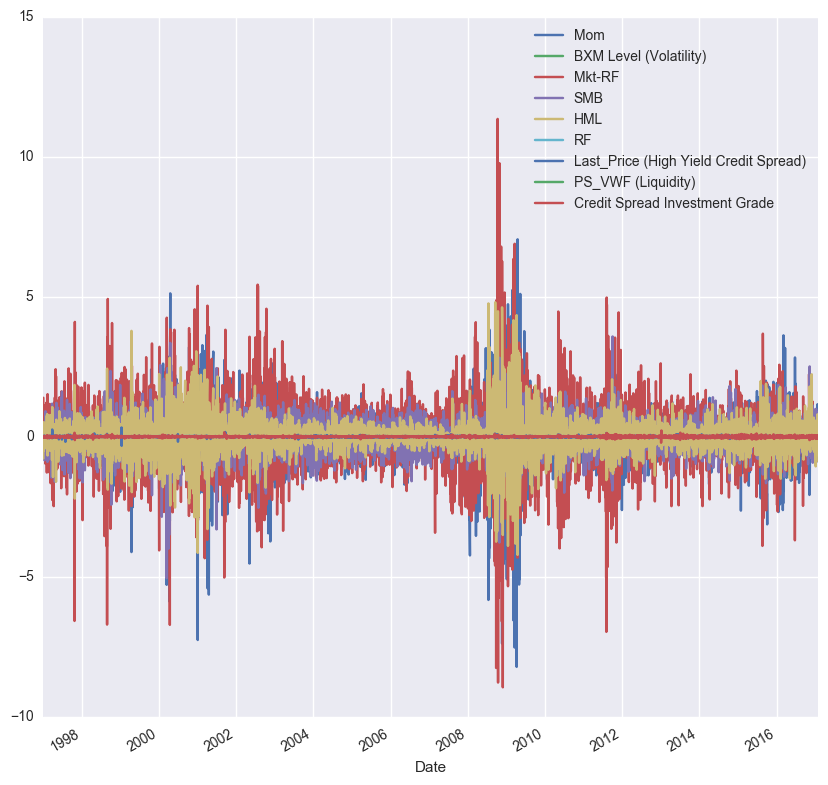

In [20]:
df_new_day = df_mom.join(df_vol).join(df_mkt_hml_smb_rf).join(df_hy_credit).join(df_liq).join(df_inv_grade)
df_new_day = df_new_day.ix['1997-01-01':]

## Replace volatility and high yield credit spread with log returns (they are prices previously)
df_new_day['BXM Level (Volatility)'] = np.log(df_new_day['BXM Level (Volatility)'])
df_new_day['BXM Level (Volatility)'] = df_new_day['BXM Level (Volatility)'].diff()
# df_new_day['BXM Level (Volatility)'] *= 100

df_new_day['Last_Price (High Yield Credit Spread)'] = np.log(df_new_day['Last_Price (High Yield Credit Spread)'])
df_new_day['Last_Price (High Yield Credit Spread)'] = df_new_day['Last_Price (High Yield Credit Spread)'].diff()
# df_new_day['Last_Price (High Yield Credit Spread)'] *= 100

df_new_day['Credit Spread Investment Grade'] = np.log(df_new_day['Credit Spread Investment Grade'])
df_new_day['Credit Spread Investment Grade'] = df_new_day['Credit Spread Investment Grade'].diff()

df_new_day = df_new_day.shift(-1)

# df_new_day.dropna(inplace=True)
df_new_day.plot(figsize=(10,10))
df_new_day.head()

In [21]:
df_new_day.columns

Index(['Mom   ', 'BXM Level (Volatility)', 'Mkt-RF', 'SMB', 'HML', 'RF',
       'Last_Price (High Yield Credit Spread)', 'PS_VWF (Liquidity)',
       'Credit Spread Investment Grade'],
      dtype='object')

In [22]:
df_new_day.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Mom,BXM Level (Volatility),Mkt-RF,SMB,HML,RF,Last_Price (High Yield Credit Spread),PS_VWF (Liquidity),Credit Spread Investment Grade
count,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,228.000000,4952.000000
mean,0.020974,0.000266,0.030097,0.007859,0.012931,0.008324,0.000027,0.007156,0.000084
std,0.976840,0.008710,1.235747,0.630336,0.661923,0.008472,0.020741,0.039728,0.023349
min,-8.220000,-0.094504,-8.950000,-5.050000,-4.220000,0.000000,-0.325502,-0.107787,-0.214877
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,7.050000,0.109750,11.350000,3.850000,4.800000,0.026000,0.329835,0.214599,0.222073


In [23]:
df_new_day.to_csv('Daily_Factors_Log_Returns_Aggregated.csv')

## Test for autocorrelation and mean-reversion (ADF test)

In [52]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
# autocorrelation_plot(df_new_day['Mom'])
df_new_mon.columns = [x.strip() for x in df_new_day.columns]
df_new_mon.columns

Index(['Mom', 'BXM Level (Volatility)', 'Mkt-RF', 'SMB', 'HML', 'RF',
       'Last_Price (High Yield Credit Spread)', 'PS_VWF (Liquidity)',
       'Credit Spread Investment Grade'],
      dtype='object')

In [53]:
def plot_acf_pacf(df, col):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(df[col].values.squeeze(), lags=40, ax=ax1)
    ax1.set_title(col + ' ACF')
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(df[col].values, lags=40, ax=ax2)
    ax2.set_title(col + ' PACF')

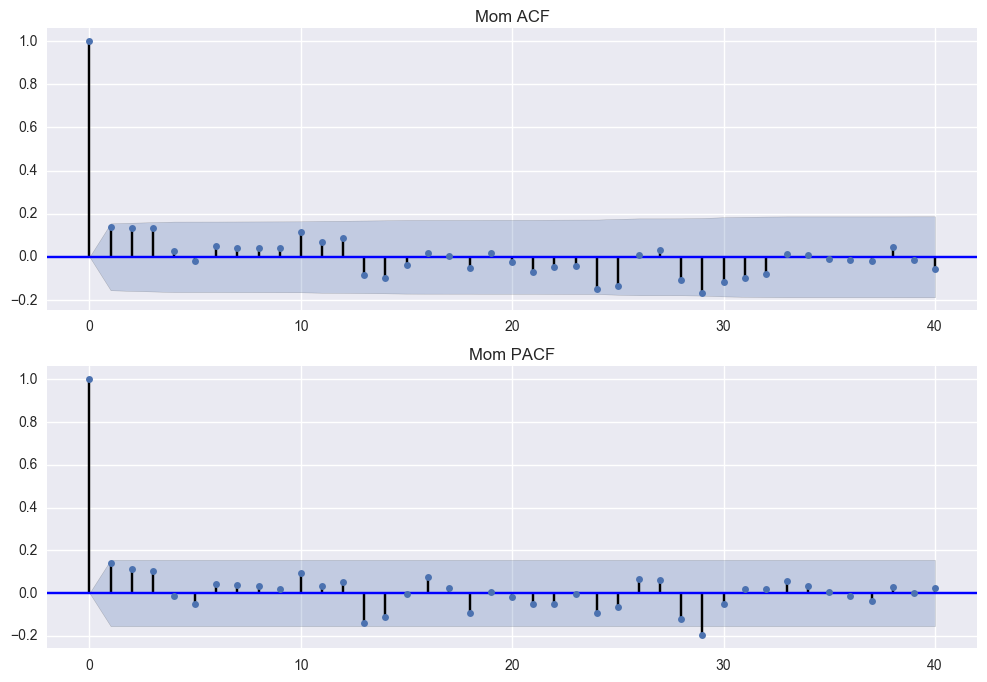

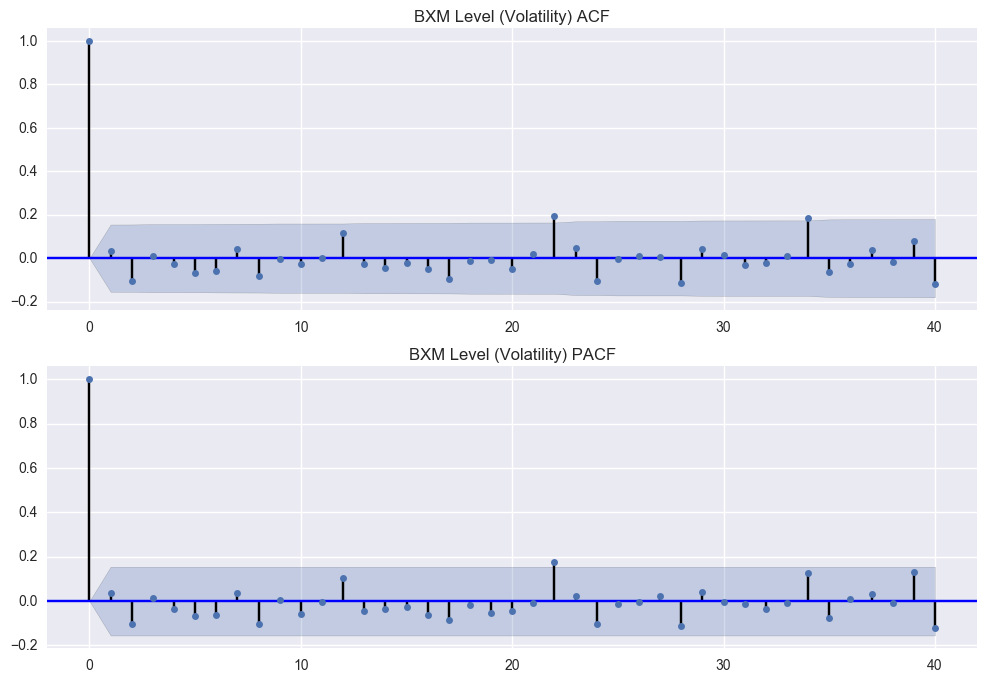

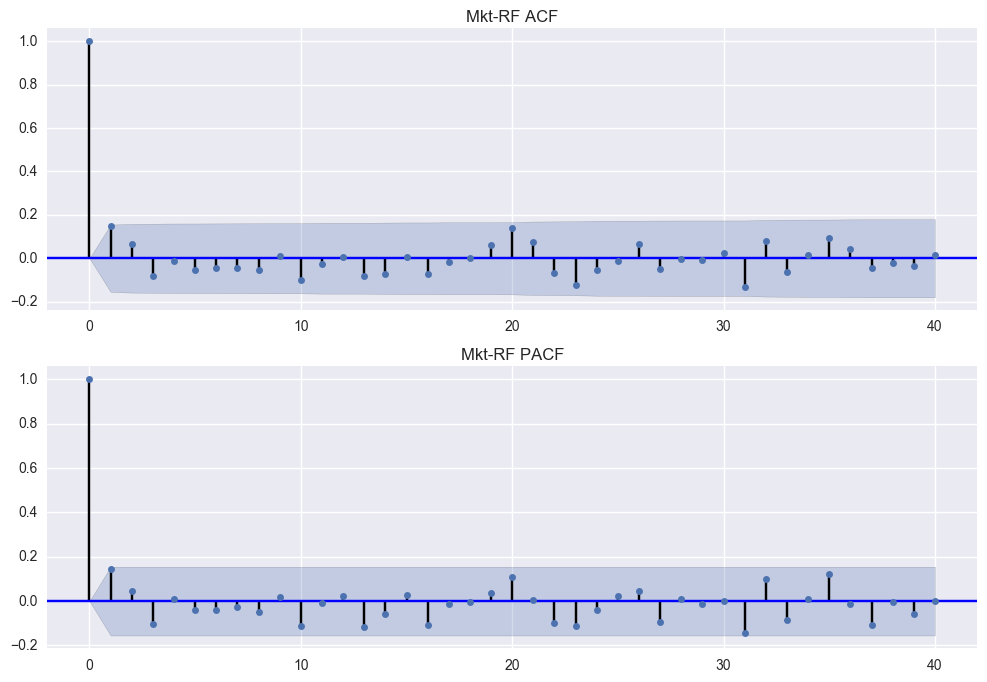

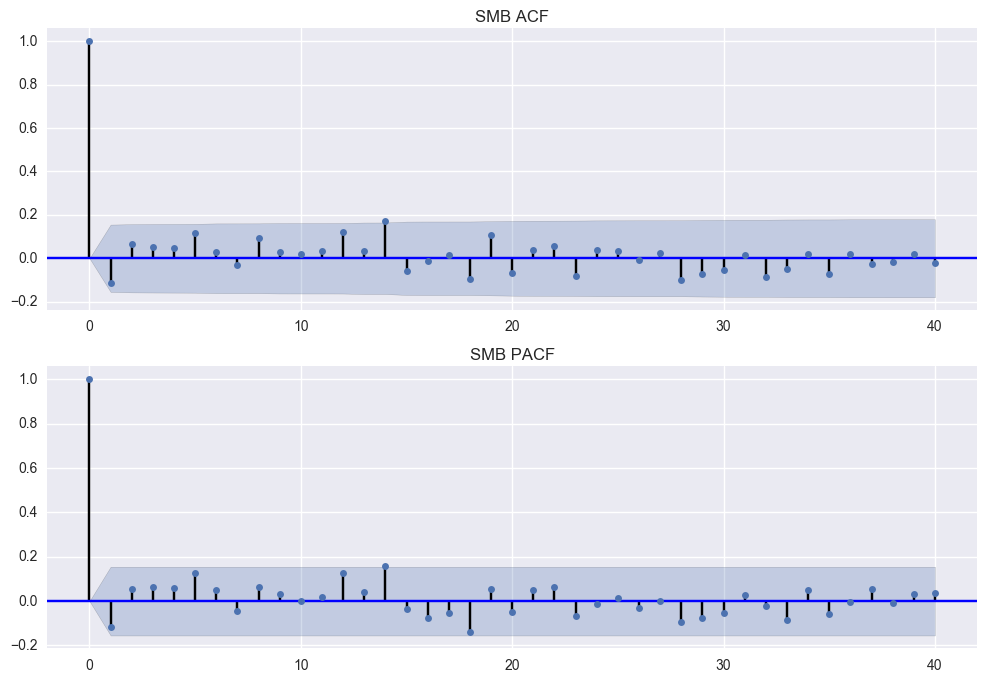

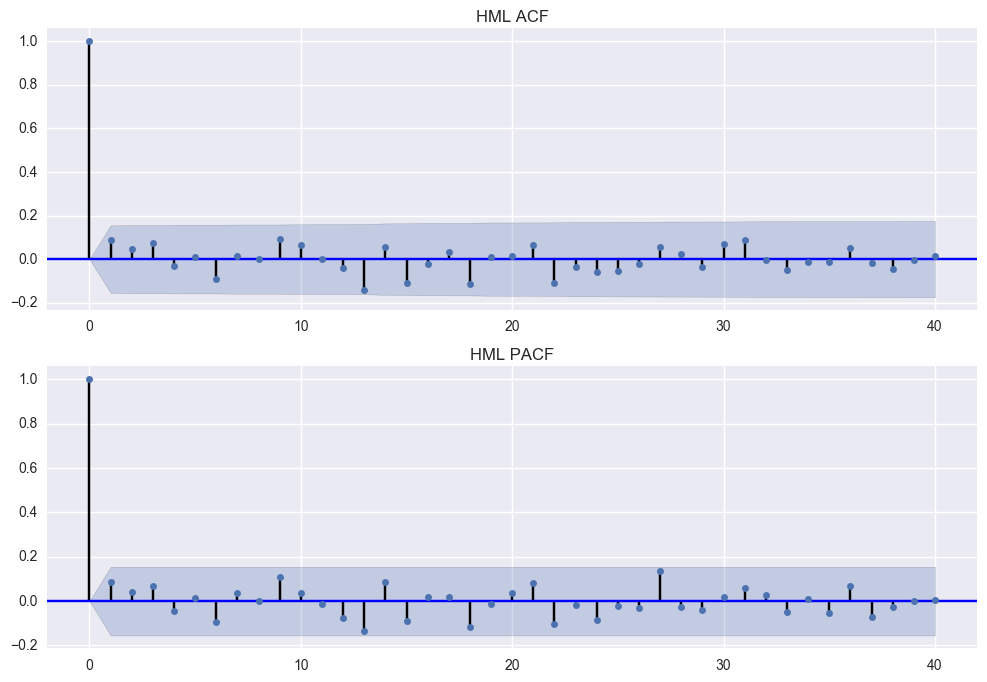

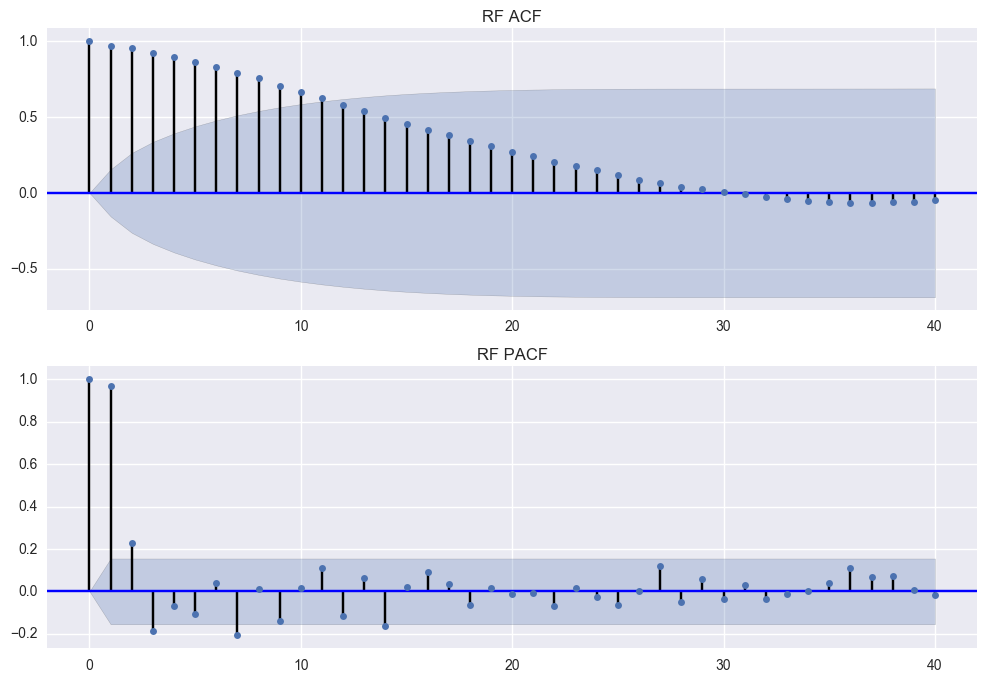

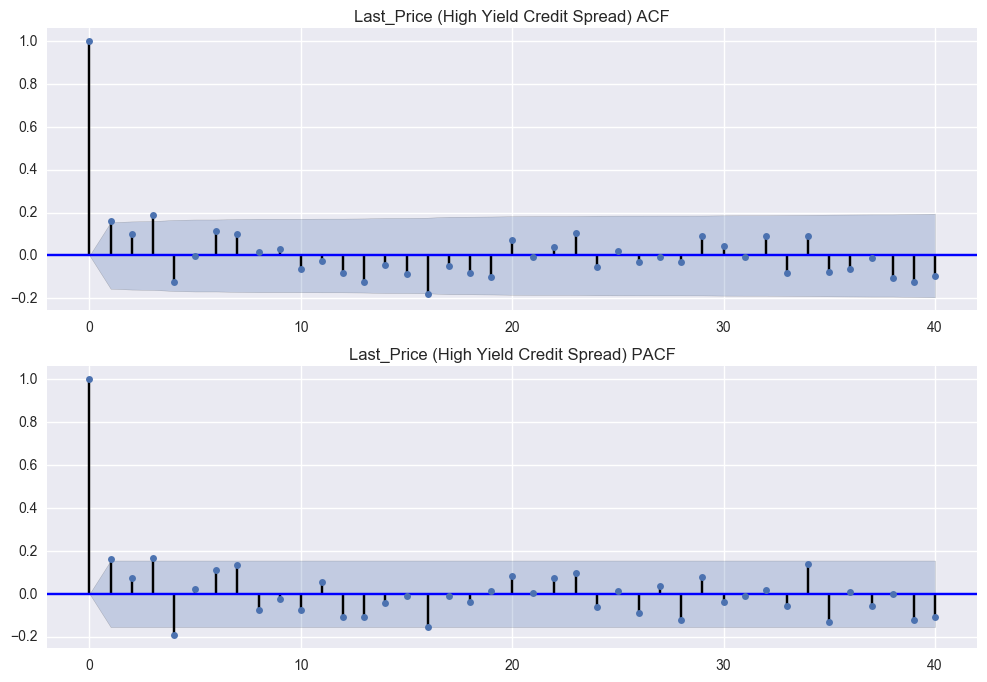

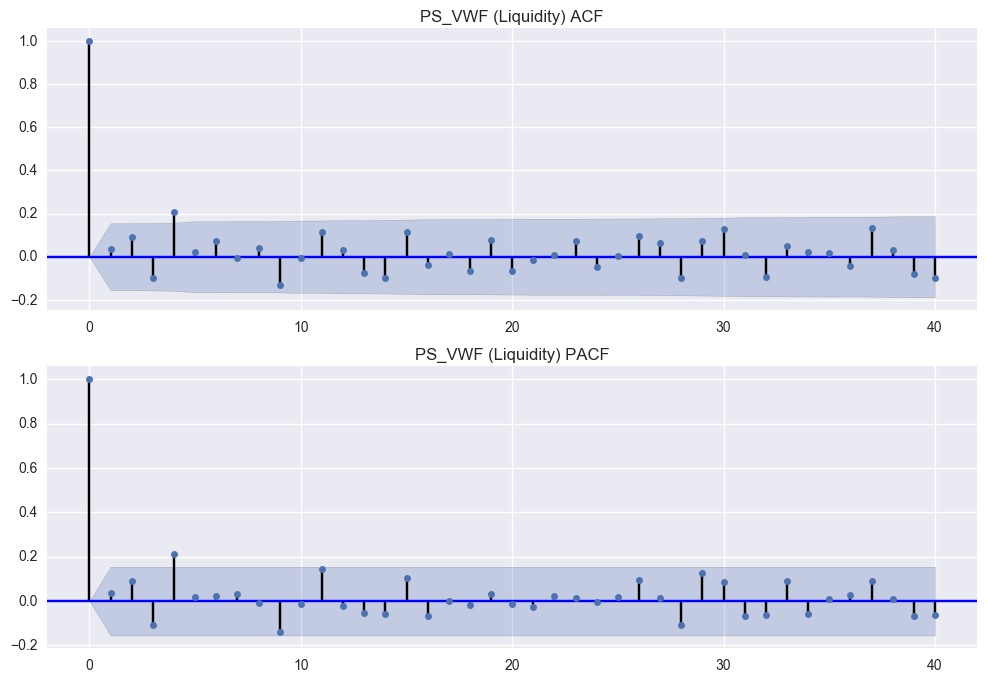

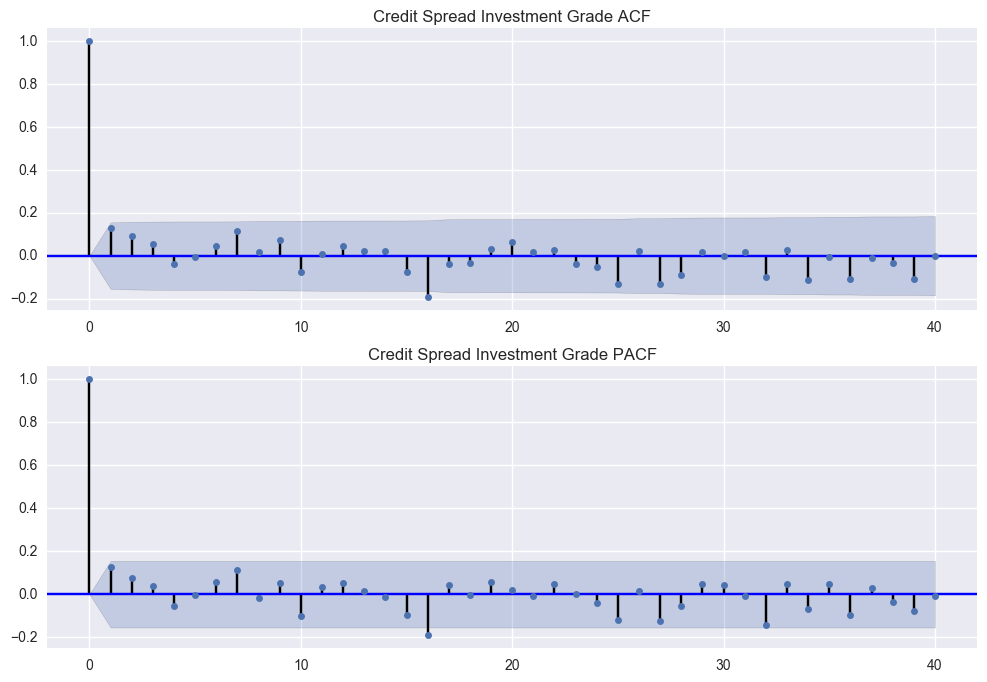

In [54]:
for col in df_new_mon.columns:
    plot_acf_pacf(df_new_mon, col)

In [58]:
def adf_mean_reversion(df, col):
    adf_results = ts.adfuller(df[col], 1)
    return adf_results[1], adf_results[4]['1%']

In [59]:
arr = [None] * len(df_new_mon.columns)
for i, col in enumerate(df_new_mon.columns):
    arr[i] = adf_mean_reversion(df_new_mon, col)  

df_new_mon_results = pd.DataFrame(arr, columns=['P-Value', '1% Level'], index=df_new_day.columns)
df_new_mon_results

,P-Value,1% Level
Mom,2.564938e-10,-3.472431
BXM Level (Volatility),1.659111e-22,-3.472161
Mkt-RF,2.186069e-19,-3.472161
SMB,3.159259e-26,-3.472161
HML,4.394653e-21,-3.472161
RF,7.145096e-01,-3.472431
Last_Price (High Yield Credit Spread),5.694407e-19,-3.472161
PS_VWF (Liquidity),1.744943e-22,-3.472161
Credit Spread Investment Grade,6.260882e-20,-3.472161


In [57]:
# ts.adfuller(df_new_mon['Credit Spread Investment Grade'], 1)
